## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# Read the data and get a look on it
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [94]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [95]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [97]:
df.converted.nunique()

2

In [154]:
converted = df.query('converted == 1')

In [102]:
converted.shape

(35237, 5)

In [155]:
converted_count = converted.user_id.nunique()

In [156]:
unique_count = (df.user_id.nunique())

In [157]:
converted_porp = converted_count/unique_count
converted_porp

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [158]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
#Create to sub_dataframes for treatment and control groups
treatment = df.query('group == "treatment"')
control = df.query('group == "control"')

In [5]:
treatment.landing_page.nunique()

2

In [6]:
#Create to sub_dataframes for rows with wrong information
treatment_old = treatment.query('landing_page == "old_page"')
control_new = control.query('landing_page == "new_page"')

In [162]:
treatment_old.shape[0]

1965

In [163]:
control_new.shape[0]

1928

In [7]:
#Total number of unmatched data rows
unmatched_rows = treatment_old.shape[0] + control_new.shape[0]
unmatched_rows

3893

f. Do any of the rows have missing values?

In [8]:
#Looking at our data info to count for the messing data points
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### Note:
We have no missing data points (no nulls)

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [164]:
#Preparing to remove the rows where groups and landing pages don't match correct
remove_df = treatment_old.append(control_new).index

In [165]:
#Creating the new clean dataframe 
df2 = df.drop(remove_df)

In [166]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [167]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [168]:
#Exploring the new clean dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [169]:
df2.user_id.nunique()

290584

In [118]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [170]:
#Check for duplicated data
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [171]:
df2[df2['user_id'] == 773192 ]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [172]:
#Remove duplicated data
df2.drop(2893, inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [173]:
#Exploring the data statistics
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [174]:
#Calculating the conversion rate for the control group
control_conversion_rate = df2[df2['group'] == 'control']['converted'].mean()
control_conversion_rate

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [175]:
#Calculating the conversion rate for the treatment group
treatment_conversion_rate = df2[df2['group'] == 'treatment']['converted'].mean()
treatment_conversion_rate

0.11880806551510564

d. What is the probability that an individual received the new page?

In [176]:
##Calculating the probability of receiving the new page for any user
(df2['landing_page'] == 'new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**My Answer:**
From the previouce results:

1- Conversion rate through the old page is about 0.120

2- Conversion rate through the new page is about 0.119

So I think there is 'no' evidence to conclude that the new page leads to more conversion than the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis:**

Null Hypothesis: The old page is better than the new page, in other words, the old page has greater conversion rate.

Alternative Hpothesis: The new page is as the old page or better than the old page, the new page has equal or greater 
conversion rate than the old page.

                 H0: p_old ≥ p_new
                 H1: p_new > p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [177]:
conversion_rate = df2.converted.mean()
conversion_rate

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

c. What is $n_{new}$, the number of individuals in the treatment group?

In [178]:
treatment = df2[df2['group'] == 'treatment']
treatment.shape[0]

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [179]:
control = df2[df2['group'] == 'control']
control.shape[0]

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [180]:
new_page_converted = np.random.choice([0, 1], size = treatment.shape[0], p = [(1- conversion_rate), conversion_rate])


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [181]:
old_page_converted = np.random.choice([0, 1], size = control.shape[0], p = [(1-conversion_rate), conversion_rate])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [209]:
#Runnig the simulation for Hypothesis testing 
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0, 1], size = treatment.shape[0], p = [(1- conversion_rate), conversion_rate])
    old_page_converted = np.random.choice([0, 1], size = control.shape[0], p = [(1-conversion_rate), conversion_rate])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [210]:
#Creating array for the rates differences
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

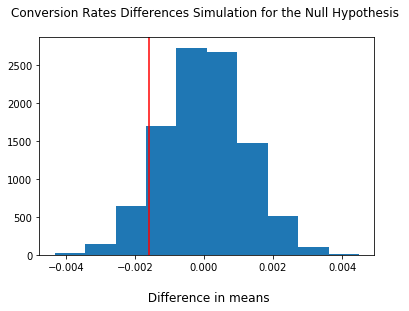

In [211]:
#Create a plot for the results
plt.hist(p_diffs)
plt.title('Conversion Rates Differences Simulation for the Null Hypothesis \n')
plt.xlabel('\n Difference in means', fontsize = 12)
plt.axvline((treatment_conversion_rate - control_conversion_rate), color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [212]:
#Calculating the p-value
obs_diff = (treatment_conversion_rate) - (control_conversion_rate)

(p_diffs > obs_diff).mean()

0.90680000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Results Explanation**

The p-value calculated is 0.9075. This is far greater than the typical  𝛼  level of 0.05 in business studies.
(An  𝛼  level of 0.05 indicates that we have a 5% chance of committing a Type I error if the null is true.)

So, the results indicates that we have failed to reject the null and conclude that there is not sufficient evidence to say that there is a difference between the two pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [186]:
#Using the statsmodel library to make the previous calculations
import statsmodels.api as sms

converted_old = df2.query('landing_page == "old_page" & converted == 1')['converted'].count()
converted_new = df2.query('landing_page == "new_page" & converted == 1')['converted'].count()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [187]:
sm.stats.proportions_ztest([converted_new, converted_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Notes:**

The z-test results goes with the calculations obtained during the bootstrapped hypothesis testing. 
Again, we failed to reject the null hypothesis as there is no sufficient evidence that the new page has greater conversion rate than the old one.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We have only two values for conversion column, so we're ging to use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [188]:
#Creating the intercept column
df2['intercept'] = 1

In [189]:
#Creating the dummy variables for landing page column
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])

In [190]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [191]:
#Creating the logistic regression model using statsmodel library
log_model = sms.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [192]:
#Getting the logistic regression model results summmary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:               8.077e-06
Time:                        00:31:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [193]:
#interperting the results
ab_page = np.exp(-0.0150)
ab_page

0.98511193960306265

In [194]:
ab_page_coef = 1/ ab_page
ab_page_coef

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value (0.190) here remains above an $\alpha$ level of 0.05 but is different because this is a two tailed test.
We will still fail to reject the null hypothesis in this situation.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

I guess, it is a good idea to consider more factors in our model to see if there is any remarkable changes in the results.

On the other hand, maybe adding more factors leads to some interpeting errors or misleads our results, so we need to be careful.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [195]:
#Read the countries data file into a new dataframe
countries_df = pd.read_csv('countries.csv')
countries_df.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [196]:
#Add the countries dataframe to our original datframe
df2_new = df2.set_index('user_id').join(countries_df.set_index('user_id'), on = 'user_id')

df2_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [197]:
df2_new.country.nunique()

3

In [198]:
df2_new['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [200]:
#Creating the dummy variables for  country column
df2_new[['UK', 'CA', 'US']] = pd.get_dummies(df2_new['country'])
df2_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country,US,CA,UK
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US,1,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US,1,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,1,0,0


In [206]:
#Creating the logistic regression model with countries
countries_log_model = sms.Logit(df2_new['converted'], df2_new[['intercept', 'CA', 'UK']])
results = countries_log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:45:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA             0.0099      0.013      0.746      0.456      -0.016       0.036
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

The p-values for hte countries are well above a 0.05 $\alpha$ level. And so we fail to reject the null and conclude that on it's own, there is no significant contribution from country to differences in conversion rates for the two pages.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [204]:
#looking for interaction effect on our model
df2_new['CA_page'] = df2_new['CA'] * df2_new['ab_page']
df2_new['UK_page'] = df2_new['UK'] * df2_new['ab_page']
df2_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country,US,CA,UK,CA_page,UK_page
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,1,0,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,1,0,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US,1,0,0,0,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US,1,0,0,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,1,0,0,0,0


In [205]:
interaction_log_model = sms.Logit(df2_new['converted'], df2_new[['intercept', 'ab_page', 'CA', 'UK', 'CA_page', 'UK_page']])
results =interaction_log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:               3.482e-05
Time:                        00:40:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
CA_page        0.0314      0.027      1.181      0.238      -0.021       0.084
UK_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

None of the variables have significant p-value.
Therefore, we will fail to reject the null hypothesisand conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

## Conclusion:
Based on the information availabe, we have no evidence to suggest that the new page results in more conversion rate than the old page.
We accept the null hypothesis and keep the old page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [213]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0